<a href="https://colab.research.google.com/github/pullz6/Airline_Study/blob/main/Airline_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all libraires and the dataset. 

In [ ]:
import pandas as pds
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

file = ('/content/drive/MyDrive/sample_data/Thesis/capstone_airline_reviews3.xlsx')
file_1 = ('/content/drive/MyDrive/sample_data/Thesis/reviews_data.csv')
file_2 = ('/content/drive/MyDrive/sample_data/Thesis/rating_data.csv')
airline = pds.read_excel(file)
airline = airline.dropna()
airline = airline.reset_index(drop=True)
ba_reviews = pds.read_csv(file_1)
ba_ratings = pds.read_csv(file_2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Passenger Segmentation

In [ ]:
airline.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
1,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no


Creating a new attribute to see if the review by a verified passenger or not. 

In [ ]:
import numpy as np
airline['Verified'] = np.where(airline['customer_review'].str.contains('Trip Verified'), True, False)
airline.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Verified
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,True
1,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,True
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,False
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,True
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,True


Cleaning the customer reviews in the dataset from unwanted information or characaters. 

In [ ]:
airline["customer_review"] = airline["customer_review"].str.replace("âœ… Trip Verified |","")
airline["customer_review"] = airline["customer_review"].str.replace("Not Verified |","")
airline["customer_review"] = airline["customer_review"].str.replace("|","")
airline

<ipython-input-39-a1480efaef0e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  airline["customer_review"] = airline["customer_review"].str.replace("âœ… Trip Verified |","")
<ipython-input-39-a1480efaef0e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airline["customer_review"] = airline["customer_review"].str.replace("Not Verified |","")
<ipython-input-39-a1480efaef0e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airline["customer_review"] = airline["customer_review"].str.replace("|","")


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Verified
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,Flew on Turkish Airlines IAD-IST-KHI and retu...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,True
1,Turkish Airlines,2.0,S Gonser,29th April 2019,Basel to Cape Town via Istanbul. When I arriv...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,True
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Abu Dhabi to Luxembourg via Istanbul. From AU...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,False
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,The experience with Turkish Airlines has been...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,True
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,Houston to Kiev via Istanbul. Fares seem comp...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,Ukraine International,6.0,A Dunduras,10th October 2015,Ukraine International it isn't for everyone. I...,Boeing 767,Solo Leisure,Economy Class,JFK to VNO via KBP,September 2015,2.0,4.0,2.0,1.0,4.0,5.0,yes,False
14208,Ukraine International,7.0,Filip Badziak,6th October 2015,"Warsaw to Kiev the plane was on time, Kiev air...",Boeing 767,Couple Leisure,Economy Class,WAW to BKK via KBP,January 2015,2.0,2.0,2.0,1.0,2.0,5.0,yes,False
14209,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,New York to Lviv,July 2015,1.0,1.0,1.0,1.0,1.0,1.0,no,False
14210,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,KBP to RIX,July 2015,5.0,5.0,5.0,4.0,4.0,4.0,yes,False


In [ ]:
import pandas as pd
airline['date_flown']=pd.to_datetime(airline['date_flown'].astype(str))
airline

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Verified
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,Flew on Turkish Airlines IAD-IST-KHI and retu...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes,True
1,Turkish Airlines,2.0,S Gonser,29th April 2019,Basel to Cape Town via Istanbul. When I arriv...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,2019-04-01,3.0,3.0,2.0,3.0,1.0,2.0,no,True
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Abu Dhabi to Luxembourg via Istanbul. From AU...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,2019-04-01,2.0,3.0,3.0,3.0,3.0,3.0,yes,False
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,The experience with Turkish Airlines has been...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,2019-02-01,1.0,1.0,1.0,1.0,1.0,1.0,no,True
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,Houston to Kiev via Istanbul. Fares seem comp...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,2019-03-01,1.0,3.0,2.0,2.0,1.0,1.0,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,Ukraine International,6.0,A Dunduras,10th October 2015,Ukraine International it isn't for everyone. I...,Boeing 767,Solo Leisure,Economy Class,JFK to VNO via KBP,2015-09-01,2.0,4.0,2.0,1.0,4.0,5.0,yes,False
14208,Ukraine International,7.0,Filip Badziak,6th October 2015,"Warsaw to Kiev the plane was on time, Kiev air...",Boeing 767,Couple Leisure,Economy Class,WAW to BKK via KBP,2015-01-01,2.0,2.0,2.0,1.0,2.0,5.0,yes,False
14209,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,New York to Lviv,2015-07-01,1.0,1.0,1.0,1.0,1.0,1.0,no,False
14210,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,KBP to RIX,2015-07-01,5.0,5.0,5.0,4.0,4.0,4.0,yes,False


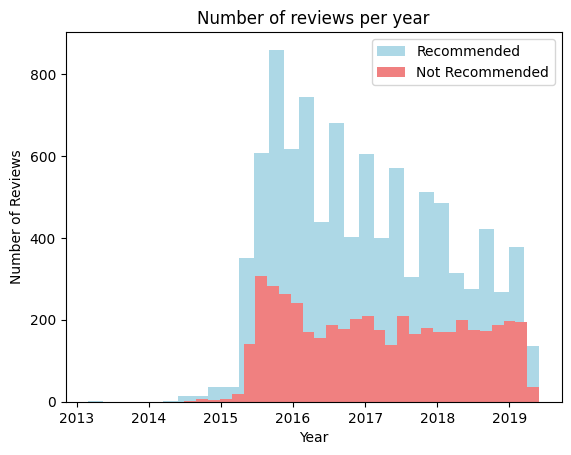

In [ ]:
plt.figure()
plt.hist(airline['date_flown'][airline['recommended']=='yes'],bins=30,color = "lightblue",label='Recommended')
plt.hist(airline['date_flown'][airline['recommended']=='no'],bins=30,color = "lightcoral",label='Not Recommended')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of reviews per year')
plt.show()

Initial analsyis on the top airlines. 

<ipython-input-42-c3e03af118df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_airline = airline.groupby('airline')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()


<Figure size 640x480 with 0 Axes>

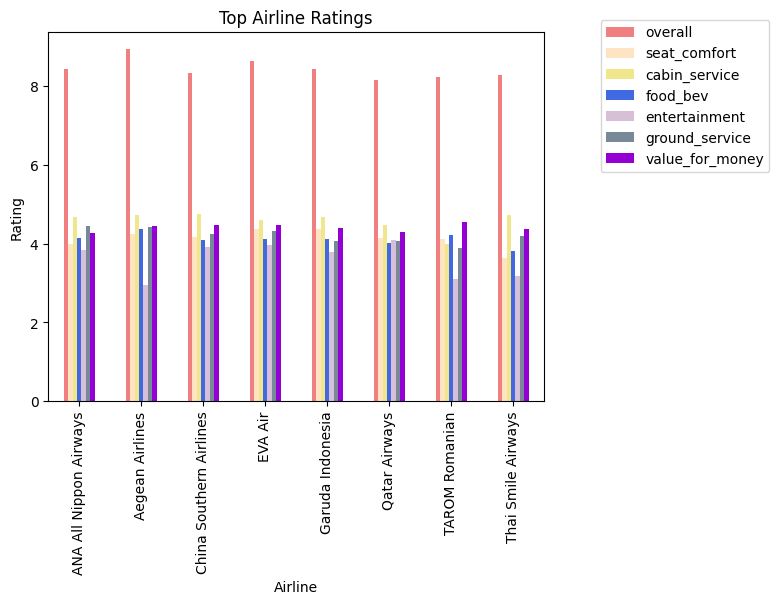

In [ ]:
grouped_by_airline = airline.groupby('airline')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
grouped_by_airline = grouped_by_airline[grouped_by_airline['overall'] > 8]
plt.figure()
grouped_by_airline.plot.bar(color={"overall": "lightcoral", "seat_comfort": "bisque","cabin_service": "khaki","food_bev": "royalblue","entertainment": "thistle","ground_service": "lightslategrey","value_for_money": "darkviolet"})
plt.xlabel('Airline')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Top Airline Ratings')
plt.show()

In [ ]:
airline['traveller_type'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure'],
      dtype=object)

In [ ]:
airline['cabin'].unique()

array(['Economy Class', 'Business Class', 'First Class',
       'Premium Economy'], dtype=object)

Preparing a dataset copy for K-means clustering analysis. 

In [ ]:
x = airline.copy()
x.drop(['customer_review', 'aircraft','review_date','date_flown','route','airline','author'], axis=1, inplace=True)

Converting categorical data into numerical data. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = x['traveller_type']
z= x['cabin']

x['traveller_type'] = le.fit_transform(x['traveller_type'])
y = le.transform(y)

x['cabin'] = le.fit_transform(x['cabin'])

z = le.transform(z)

p = x['Verified']

x['Verified'] = le.fit_transform(x['Verified'])

p = le.transform(p)

r = x['recommended']

x['recommended'] = le.fit_transform(x['recommended'])

r = le.transform(r)

x.head()

,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Verified
0,10.0,3,1,4.0,5.0,5.0,5.0,5.0,5.0,1,1
1,2.0,3,1,3.0,3.0,2.0,3.0,1.0,2.0,0,1
2,6.0,3,1,2.0,3.0,3.0,3.0,3.0,3.0,1,0
3,1.0,3,1,1.0,1.0,1.0,1.0,1.0,1.0,0,1
4,2.0,3,1,1.0,3.0,2.0,2.0,1.0,1.0,0,1


Conduting the k-means clustering method to better understand how many clusters should we select for the clustering. 

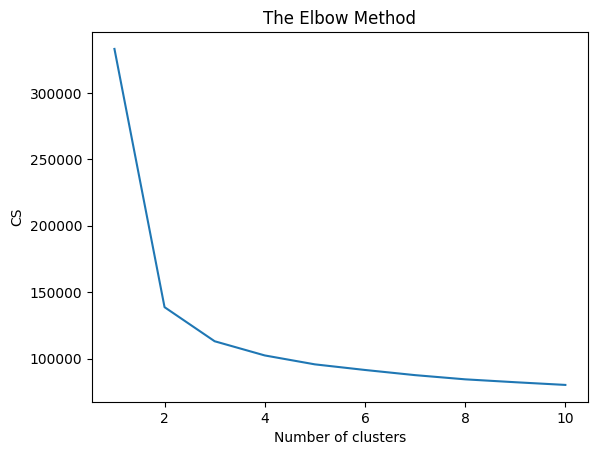

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

We can see that 2 clusters seems ideal for our k-means clustering. 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(r == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, r.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(r.size)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Result: 13465 out of 14212 samples were correctly labeled.
Accuracy score: 0.95


In [ ]:
import pandas as pd
cent = kmeans.cluster_centers_
kmeans = pd.DataFrame(labels)
airline.insert((x.shape[1]),'kmeans',kmeans)
x.insert((x.shape[1]),'kmeans',kmeans)
x.head()

,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Verified,kmeans
0,10.0,3,1,4.0,5.0,5.0,5.0,5.0,5.0,1,1,1
1,2.0,3,1,3.0,3.0,2.0,3.0,1.0,2.0,0,1,0
2,6.0,3,1,2.0,3.0,3.0,3.0,3.0,3.0,1,0,0
3,1.0,3,1,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0
4,2.0,3,1,1.0,3.0,2.0,2.0,1.0,1.0,0,1,0


<ipython-input-50-7c966cafb0c5>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_traveller = airline_cluster_1.groupby('traveller_type')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
<ipython-input-50-7c966cafb0c5>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_traveller = airline_cluster_2.groupby('traveller_type')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()


Text(0.5, 0.98, 'Cluster Study by Traveller Type')

<Figure size 2500x480 with 0 Axes>

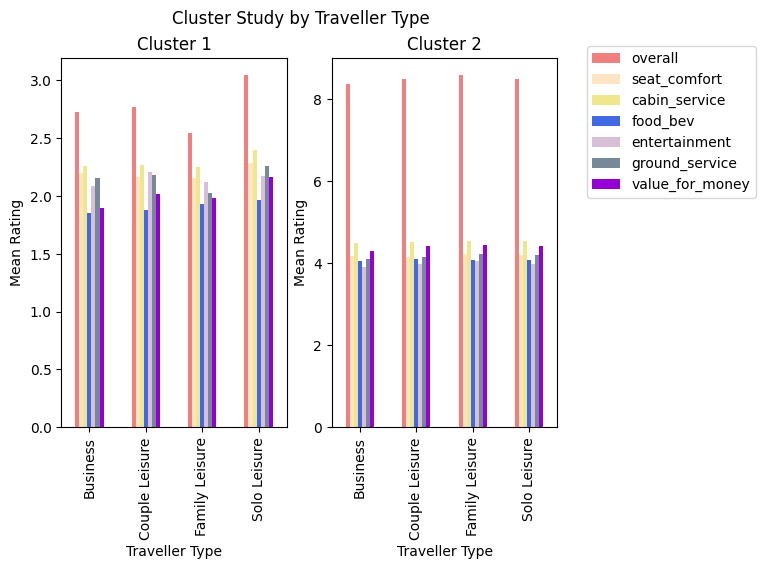

In [ ]:
airline_cluster_1 = airline[airline['kmeans']==0]
airline_cluster_2 = airline[airline['kmeans']==1]
plt.figure().set_figwidth(25)
fig, (axs1,axs2) = plt.subplots(1,2)
grouped_by_traveller = airline_cluster_1.groupby('traveller_type')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
grouped_by_traveller.plot.bar(color={"overall": "lightcoral", "seat_comfort": "bisque","cabin_service": "khaki","food_bev": "royalblue","entertainment": "thistle","ground_service": "lightslategrey","value_for_money": "darkviolet"},ax=axs1,legend=False)
grouped_by_traveller = airline_cluster_2.groupby('traveller_type')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
grouped_by_traveller.plot.bar(color={"overall": "lightcoral", "seat_comfort": "bisque","cabin_service": "khaki","food_bev": "royalblue","entertainment": "thistle","ground_service": "lightslategrey","value_for_money": "darkviolet"},ax=axs2)
plt.legend(bbox_to_anchor=(1.1, 1.05))
axs1.set_xlabel('Traveller Type')
axs2.set_xlabel('Traveller Type')
axs1.set_ylabel('Mean Rating')
axs2.set_ylabel('Mean Rating')
axs1.set_title('Cluster 1')
axs2.set_title('Cluster 2')
fig.suptitle('Cluster Study by Traveller Type')

<ipython-input-51-5884a9c6bfeb>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_cabin = airline_cluster_1.groupby('cabin')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
<ipython-input-51-5884a9c6bfeb>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_cabin = airline_cluster_2.groupby('cabin')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()


Text(0.5, 0.98, 'Cluster Study by Cabin Type')

<Figure size 2500x480 with 0 Axes>

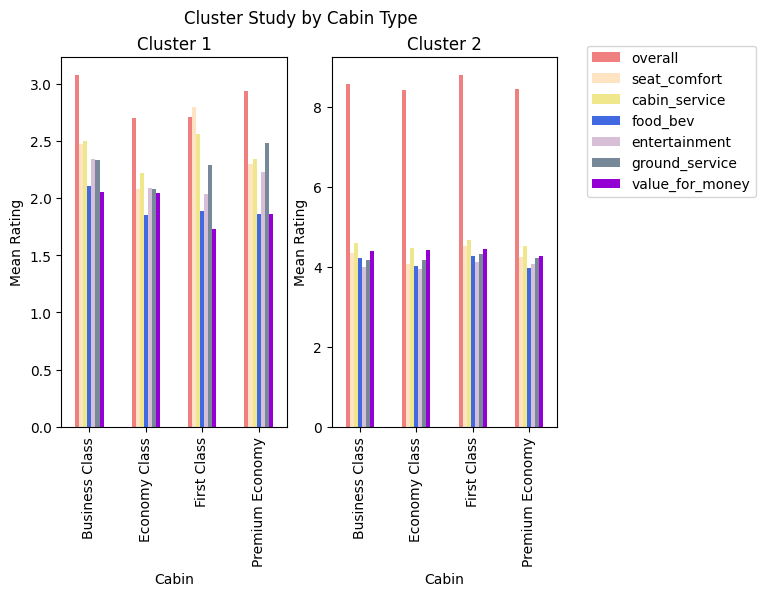

In [ ]:
plt.figure().set_figwidth(25)
fig, (axs1,axs2) = plt.subplots(1,2)
grouped_by_cabin = airline_cluster_1.groupby('cabin')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
grouped_by_cabin.plot.bar(color={"overall": "lightcoral", "seat_comfort": "bisque","cabin_service": "khaki","food_bev": "royalblue","entertainment": "thistle","ground_service": "lightslategrey","value_for_money": "darkviolet"},ax=axs1,legend=False)
grouped_by_cabin = airline_cluster_2.groupby('cabin')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
grouped_by_cabin.plot.bar(color={"overall": "lightcoral", "seat_comfort": "bisque","cabin_service": "khaki","food_bev": "royalblue","entertainment": "thistle","ground_service": "lightslategrey","value_for_money": "darkviolet"},ax=axs2)
plt.legend(bbox_to_anchor=(1.1, 1.05))
axs1.set_xlabel('Cabin')
axs2.set_xlabel('Cabin')
axs1.set_ylabel('Mean Rating')
axs2.set_ylabel('Mean Rating')
axs1.set_title('Cluster 1')
axs2.set_title('Cluster 2')
fig.suptitle('Cluster Study by Cabin Type')

In [ ]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

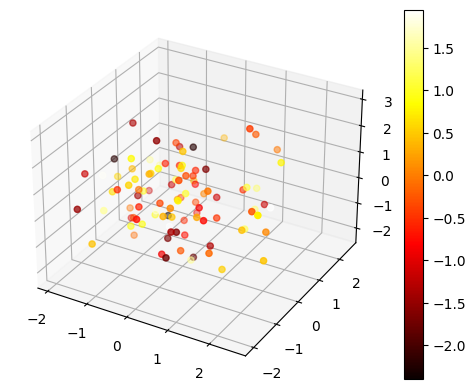

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
c = np.random.standard_normal(100)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [ ]:
x.head()

,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Verified,kmeans
0,10.0,3,1,4.0,5.0,5.0,5.0,5.0,5.0,1,1,1
1,2.0,3,1,3.0,3.0,2.0,3.0,1.0,2.0,0,1,0
2,6.0,3,1,2.0,3.0,3.0,3.0,3.0,3.0,1,0,0
3,1.0,3,1,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0
4,2.0,3,1,1.0,3.0,2.0,2.0,1.0,1.0,0,1,0


In [ ]:
#Guassion clustering
x.drop('kmeans',axis=1,inplace=True)
from sklearn.mixture import GaussianMixture 
model = GaussianMixture(n_components=2,init_params='kmeans')
model.fit(x)
clust_labels3 = model.predict(x)
gmm = pd.DataFrame(clust_labels3)
x.insert((x.shape[1]),'gmm',gmm)
x.head()

,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Verified,gmm
0,10.0,3,1,4.0,5.0,5.0,5.0,5.0,5.0,1,1,0
1,2.0,3,1,3.0,3.0,2.0,3.0,1.0,2.0,0,1,1
2,6.0,3,1,2.0,3.0,3.0,3.0,3.0,3.0,1,0,0
3,1.0,3,1,1.0,1.0,1.0,1.0,1.0,1.0,0,1,1
4,2.0,3,1,1.0,3.0,2.0,2.0,1.0,1.0,0,1,1


In [ ]:
gmm_1 = x[x['gmm']==1]
gmm_0 = x[x['gmm']==0]
airline.insert((x.shape[1]),'gmm',gmm)
airline

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,kmeans,gmm,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Verified
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,Flew on Turkish Airlines IAD-IST-KHI and retu...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,4.0,1,0,5.0,5.0,5.0,5.0,5.0,yes,True
1,Turkish Airlines,2.0,S Gonser,29th April 2019,Basel to Cape Town via Istanbul. When I arriv...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,2019-04-01,3.0,0,1,3.0,2.0,3.0,1.0,2.0,no,True
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Abu Dhabi to Luxembourg via Istanbul. From AU...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,2019-04-01,2.0,0,0,3.0,3.0,3.0,3.0,3.0,yes,False
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,The experience with Turkish Airlines has been...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,2019-02-01,1.0,0,1,1.0,1.0,1.0,1.0,1.0,no,True
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,Houston to Kiev via Istanbul. Fares seem comp...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,2019-03-01,1.0,0,1,3.0,2.0,2.0,1.0,1.0,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,Ukraine International,6.0,A Dunduras,10th October 2015,Ukraine International it isn't for everyone. I...,Boeing 767,Solo Leisure,Economy Class,JFK to VNO via KBP,2015-09-01,2.0,1,0,4.0,2.0,1.0,4.0,5.0,yes,False
14208,Ukraine International,7.0,Filip Badziak,6th October 2015,"Warsaw to Kiev the plane was on time, Kiev air...",Boeing 767,Couple Leisure,Economy Class,WAW to BKK via KBP,2015-01-01,2.0,0,0,2.0,2.0,1.0,2.0,5.0,yes,False
14209,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,New York to Lviv,2015-07-01,1.0,0,1,1.0,1.0,1.0,1.0,1.0,no,False
14210,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,KBP to RIX,2015-07-01,5.0,1,0,5.0,5.0,4.0,4.0,4.0,yes,False


<ipython-input-56-4dceeac63971>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_traveller = grouped_by_traveller.groupby('traveller_type')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()


<Figure size 2500x480 with 0 Axes>

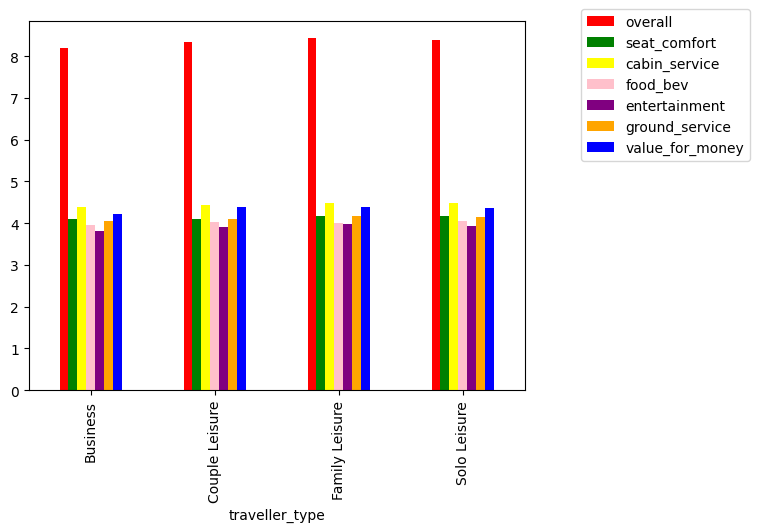

In [ ]:
plt.figure().set_figwidth(25)
grouped_by_traveller = airline[airline['gmm'] ==0]
grouped_by_traveller = grouped_by_traveller.groupby('traveller_type')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
grouped_by_traveller.plot.bar(color={"overall": "red", "seat_comfort": "green","cabin_service": "yellow","food_bev": "pink","entertainment": "purple","ground_service": "orange","value_for_money": "blue"})
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

<ipython-input-57-c204c4d718fa>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_traveller = grouped_by_traveller.groupby('traveller_type')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()


<Figure size 640x480 with 0 Axes>

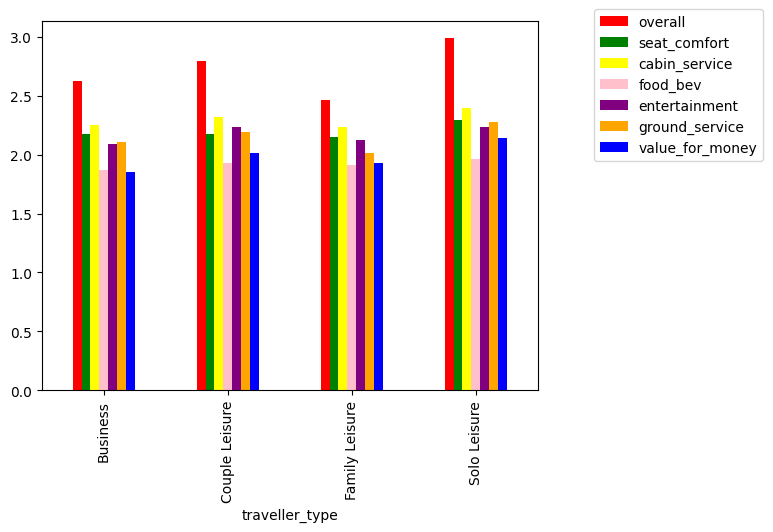

In [ ]:
plt.figure()
grouped_by_traveller = airline[airline['gmm'] ==1]
grouped_by_traveller = grouped_by_traveller.groupby('traveller_type')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
grouped_by_traveller.plot.bar(color={"overall": "red", "seat_comfort": "green","cabin_service": "yellow","food_bev": "pink","entertainment": "purple","ground_service": "orange","value_for_money": "blue"})
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
airline.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,kmeans,gmm,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Verified
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,Flew on Turkish Airlines IAD-IST-KHI and retu...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,4.0,1,0,5.0,5.0,5.0,5.0,5.0,yes,True
1,Turkish Airlines,2.0,S Gonser,29th April 2019,Basel to Cape Town via Istanbul. When I arriv...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,2019-04-01,3.0,0,1,3.0,2.0,3.0,1.0,2.0,no,True
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Abu Dhabi to Luxembourg via Istanbul. From AU...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,2019-04-01,2.0,0,0,3.0,3.0,3.0,3.0,3.0,yes,False
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,The experience with Turkish Airlines has been...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,2019-02-01,1.0,0,1,1.0,1.0,1.0,1.0,1.0,no,True
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,Houston to Kiev via Istanbul. Fares seem comp...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,2019-03-01,1.0,0,1,3.0,2.0,2.0,1.0,1.0,no,True


<ipython-input-59-2a8a9522574b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_cabin = grouped_by_cabin.groupby('cabin')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()


<Figure size 640x480 with 0 Axes>

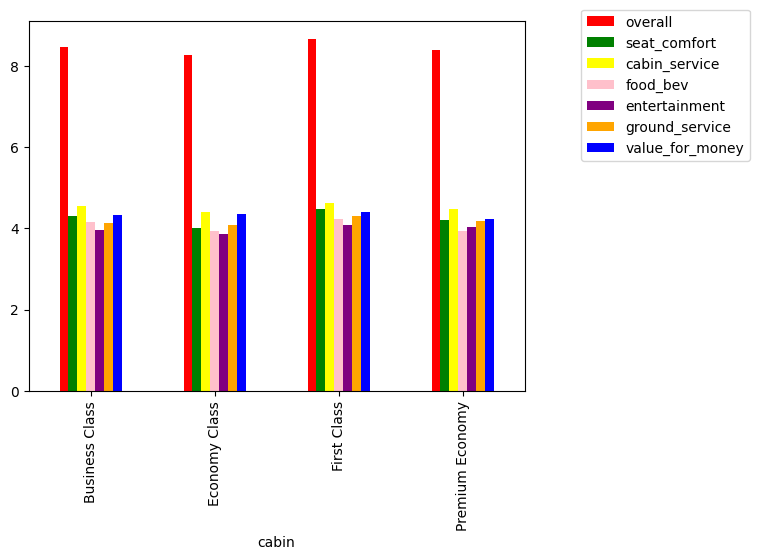

In [ ]:
plt.figure()
grouped_by_cabin = airline[airline['gmm'] ==0]
grouped_by_cabin = grouped_by_cabin.groupby('cabin')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
grouped_by_cabin.plot.bar(color={"overall": "red", "seat_comfort": "green","cabin_service": "yellow","food_bev": "pink","entertainment": "purple","ground_service": "orange","value_for_money": "blue"})
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

<ipython-input-60-9b4aa6244e4b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_cabin = grouped_by_cabin.groupby('cabin')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()


<Figure size 640x480 with 0 Axes>

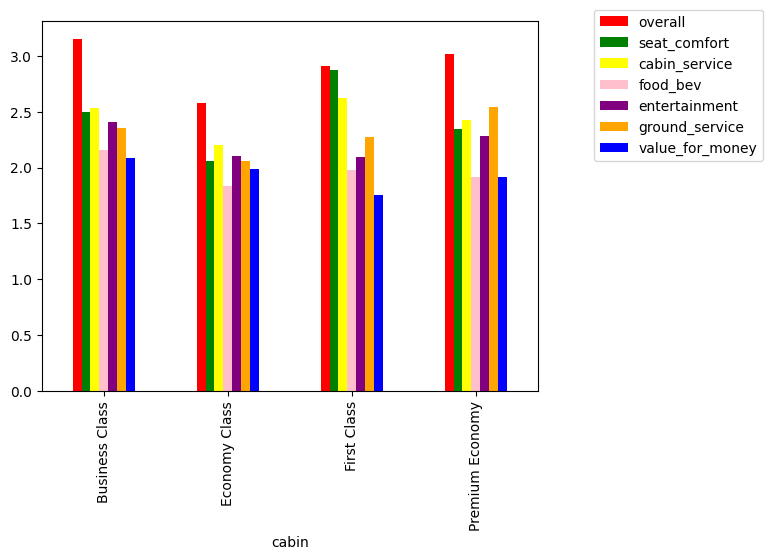

In [ ]:
plt.figure()
grouped_by_cabin = airline[airline['gmm'] ==1]
grouped_by_cabin = grouped_by_cabin.groupby('cabin')['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'].mean()
grouped_by_cabin.plot.bar(color={"overall": "red", "seat_comfort": "green","cabin_service": "yellow","food_bev": "pink","entertainment": "purple","ground_service": "orange","value_for_money": "blue"})
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
airline_1 = pd.DataFrame(airline.route.str.split(' to ',1).tolist(),columns = ['fips','row'])
airline['Start'] = airline_1['fips']
airline['row'] = airline_1['row']
airline['Transit'] = airline['row'].str.contains('via')

<ipython-input-67-6660437a9bf3>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  airline_1 = pd.DataFrame(airline.route.str.split(' to ',1).tolist(),columns = ['fips','row'])


In [ ]:
airline

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,...,food_bev,entertainment,ground_service,value_for_money,recommended,Verified,Start,Destination,row,Transit
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,Flew on Turkish Airlines IAD-IST-KHI and retu...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,...,5.0,5.0,5.0,5.0,yes,True,Washington Dulles,Karachi,Karachi,False
1,Turkish Airlines,2.0,S Gonser,29th April 2019,Basel to Cape Town via Istanbul. When I arriv...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,2019-04-01,...,2.0,3.0,1.0,2.0,no,True,Basel,Cape Town via Istanbul,Cape Town via Istanbul,True
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Abu Dhabi to Luxembourg via Istanbul. From AU...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,2019-04-01,...,3.0,3.0,3.0,3.0,yes,False,Abu Dhabi,Luxembourg via Istanbul,Luxembourg via Istanbul,True
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,The experience with Turkish Airlines has been...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,2019-02-01,...,1.0,1.0,1.0,1.0,no,True,Venice,Boston via Istanbul,Boston via Istanbul,True
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,Houston to Kiev via Istanbul. Fares seem comp...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,2019-03-01,...,2.0,2.0,1.0,1.0,no,True,Houston,Kiev via Istanbul,Kiev via Istanbul,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,Ukraine International,6.0,A Dunduras,10th October 2015,Ukraine International it isn't for everyone. I...,Boeing 767,Solo Leisure,Economy Class,JFK to VNO via KBP,2015-09-01,...,2.0,1.0,4.0,5.0,yes,False,JFK,VNO via KBP,VNO via KBP,True
14208,Ukraine International,7.0,Filip Badziak,6th October 2015,"Warsaw to Kiev the plane was on time, Kiev air...",Boeing 767,Couple Leisure,Economy Class,WAW to BKK via KBP,2015-01-01,...,2.0,1.0,2.0,5.0,yes,False,WAW,BKK via KBP,BKK via KBP,True
14209,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,New York to Lviv,2015-07-01,...,1.0,1.0,1.0,1.0,no,False,New York,Lviv,Lviv,False
14210,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,KBP to RIX,2015-07-01,...,5.0,4.0,4.0,4.0,yes,False,KBP,RIX,RIX,False


In [ ]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
libproj-dev is already the newest version (7.2.1-1~focal0).
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 proj-bin amd64 7.2.1-1~focal0 [170 kB]
Fetched 170 kB in 0s (345 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 122542 files and directories currently installed.)
Preparing to unpack .../proj-bin_7.2.1-1~focal0_amd64.deb ...
Unpacking proj-bin (7.2.1-1~focal0) ...
Setting up proj-bin (7.2.1-1~focal0) ...
Processing triggers for man-db (2.9.1-1) ...


In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 132.4 MB 16.2 MB/s 0:00:15
  Preparing metadata (setup.py) ... done
  Using cached pyproj-3.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.7 MB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for basemap
  Running setup.py clean for basemap
Failed to build basemap
ERROR: Could not build wheels for basemap, which is required to install pyproject.toml-based projects


In [ ]:
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 340 kB of archives.
After this operation, 1,538 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex6 amd64 1.9.3-1build1 [266 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-c6 amd64 1.9.3-1build1 [58.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-dev amd64 1.9.3-1build1 [16.0 kB]
Fetched 340 kB in 0s (1,368 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 122567 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-

<ipython-input-111-a062862c0fe0>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

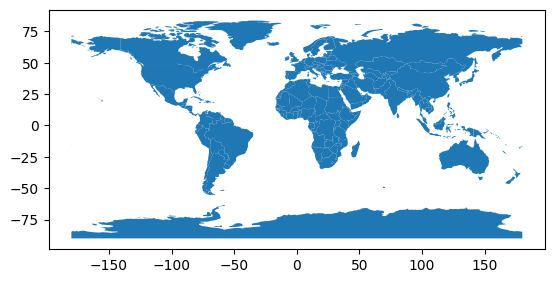

In [ ]:
import geopandas as gpd
import pandas as pd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

### **Reviews Analysis**




In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

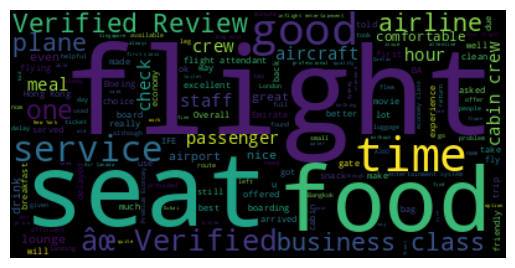

In [ ]:
common_words=''
for i in airline.customer_review:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from keras.utils import pad_sequences
lb=LabelEncoder()
airline['recommended'] = lb.fit_transform(airline['recommended'])
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(airline['customer_review'].values)
X = tokenizer.texts_to_sequences(airline['customer_review'].values)
X = pad_sequences(X)

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 524, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 524, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Splitting the data into training and testing
y=pd.get_dummies(airline['recommended'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
311/311 [==============================] - 485s 2s/step - loss: 0.4376 - accuracy: 0.7970
Epoch 2/5
311/311 [==============================] - 467s 2s/step - loss: 0.3396 - accuracy: 0.8540
Epoch 3/5
311/311 [==============================] - 466s 1s/step - loss: 0.3184 - accuracy: 0.8655
Epoch 4/5
311/311 [==============================] - 467s 2s/step - loss: 0.2867 - accuracy: 0.8820
Epoch 5/5
311/311 [==============================] - 467s 2s/step - loss: 0.2806 - accuracy: 0.8829


In [ ]:
model.evaluate(X_test,y_test)

134/134 [==============================] - 20s 147ms/step - loss: 0.3264 - accuracy: 0.8616


[0.3263968527317047, 0.8616322875022888]

In [ ]:
sample_review = tokenizer.texts_to_sequences('the flight was comfortable, i had a good time')

sample_review = pad_sequences(sample_review)
pred  = model.predict(sample_review)


2/2 [==============================] - 0s 5ms/step


In [ ]:
print(pred)

[[0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.4721164  0.5278836 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.5052154  0.49478456]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.5052154  0.49478456]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.4721164  0.5278836 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.5052154  0.49478456]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.5052154  0.49478456]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
 [0.47449908 0.5255009 ]
